# EDA

- period : 2003-01-03 ~ 2022-12-26 

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [7]:
# Load the data
df = pd.read_excel("core_data.xlsx")

df.columns

Index(['DATE', 'avg_price', 'pre_day_price', 'pre_year_price',
       'pre_7day_price', 'rainfall', 'snowfall', 'total_sunshine',
       'total_solar', 'average_humidity', '30cm_soil_temperature',
       'average_temperature', 'average_wind', 'oil', 'spring_income',
       'fall_income', 'cultivation_area', 'spring_labor', 'fall_labor',
       'cost of living', 'CPI', 'fresh index'],
      dtype='object')

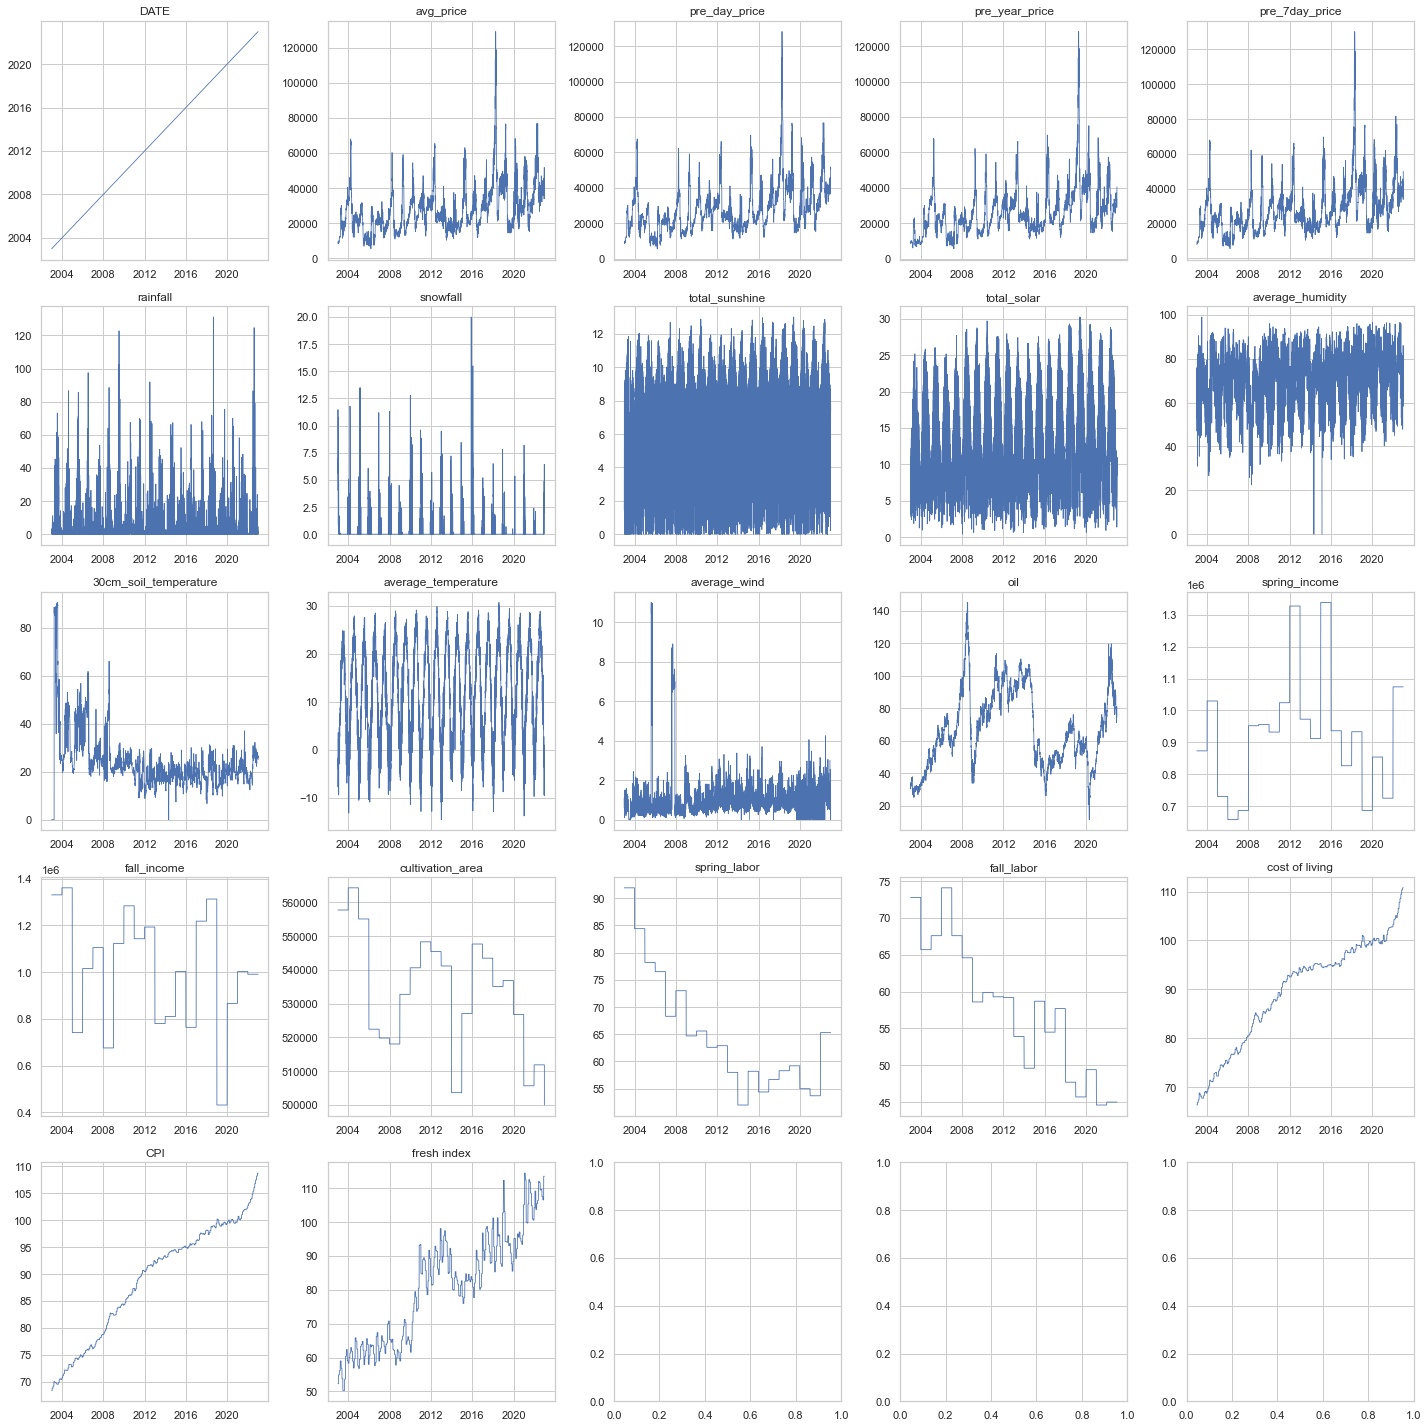

In [43]:
# plot all columns in 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].plot(df["DATE"], df[col], linewidth=0.8)
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

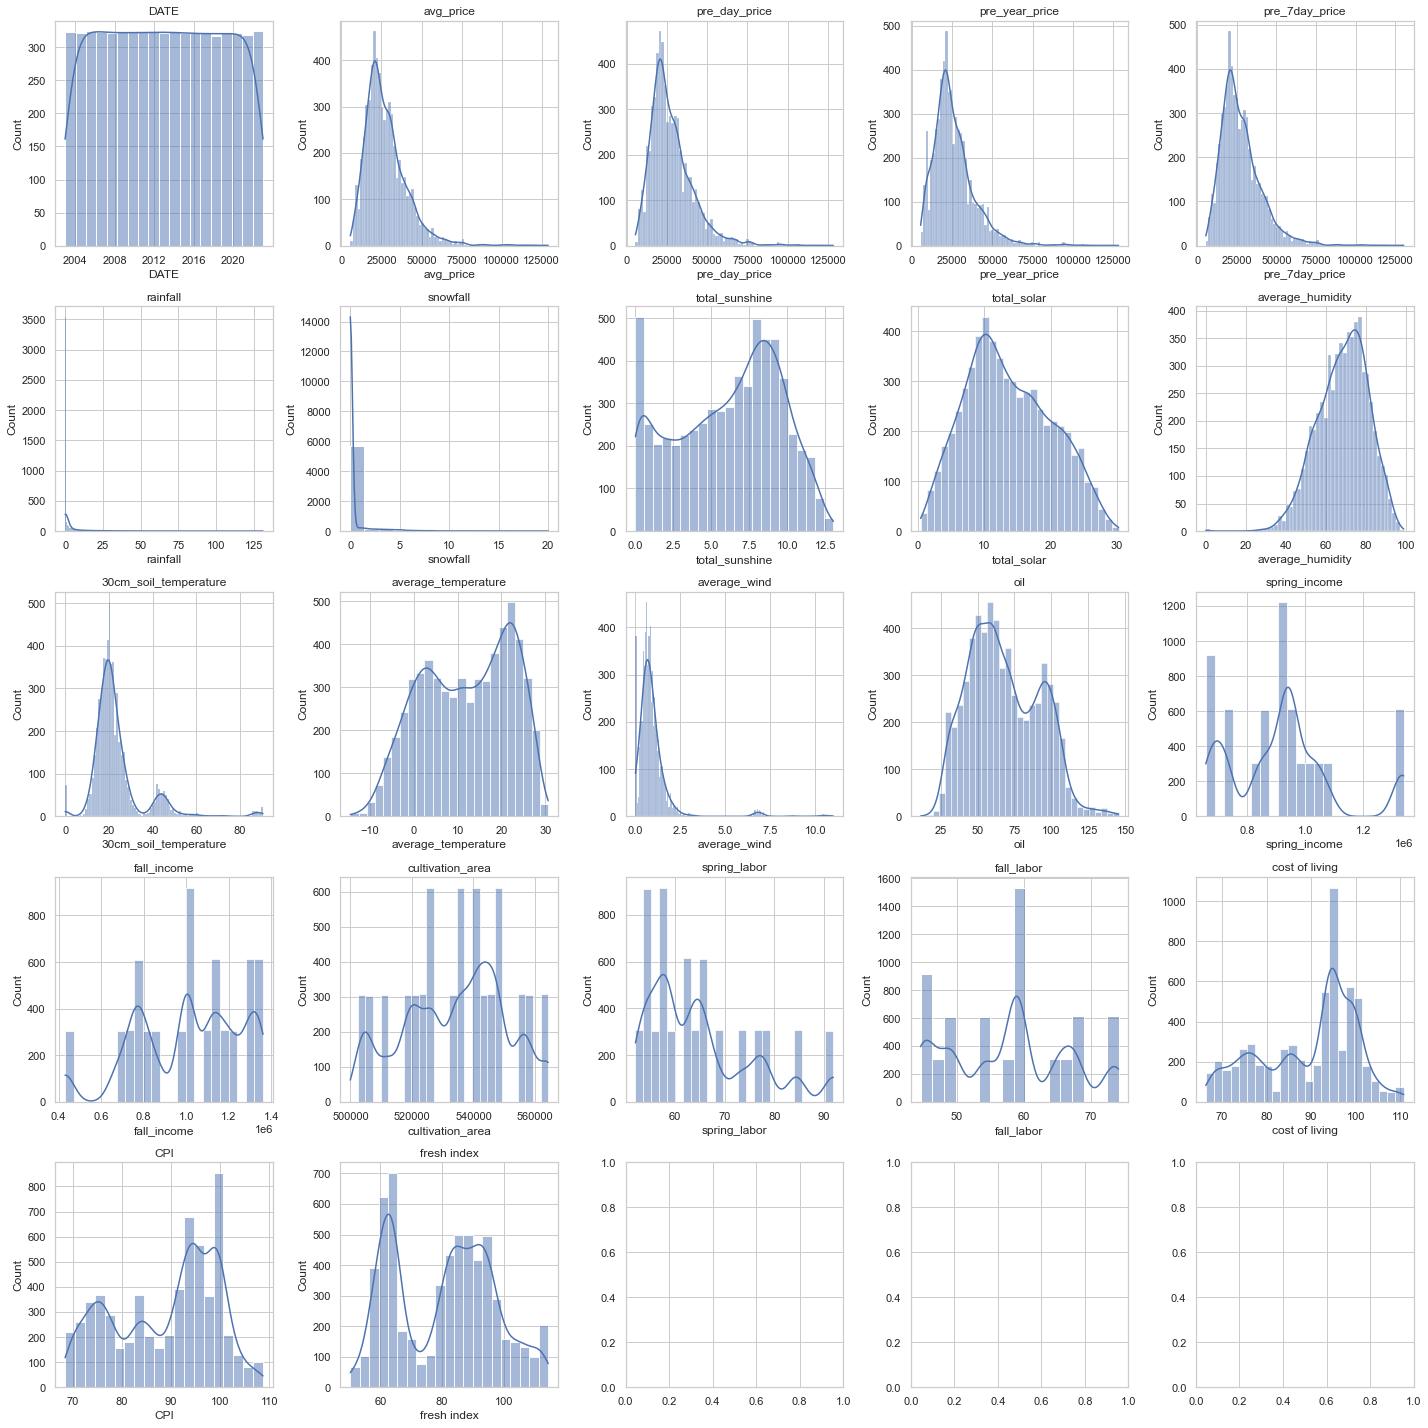

In [44]:
# plot histograms of all columns
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

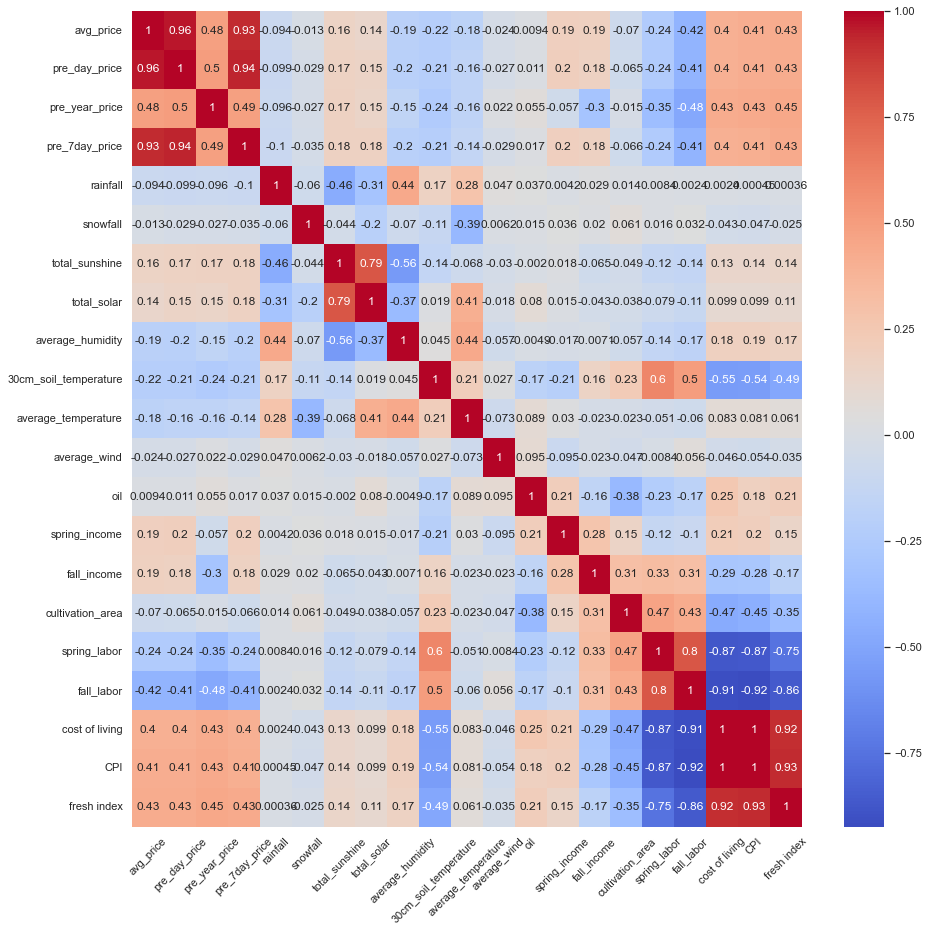

In [50]:
# EDA
# plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()


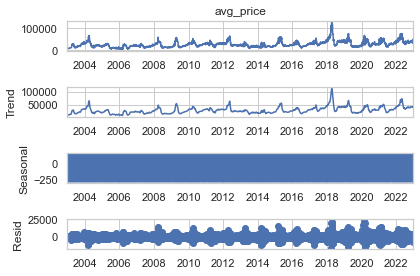

In [ ]:
# time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# set the date as index
df.set_index("DATE", inplace=True)

# decompose the time series
decomposition = seasonal_decompose(df["avg_price"], model="additive", period=12)
decomposition.plot()
plt.show()

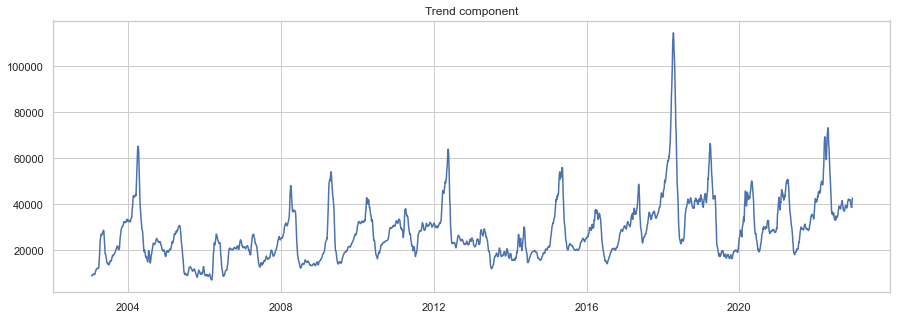

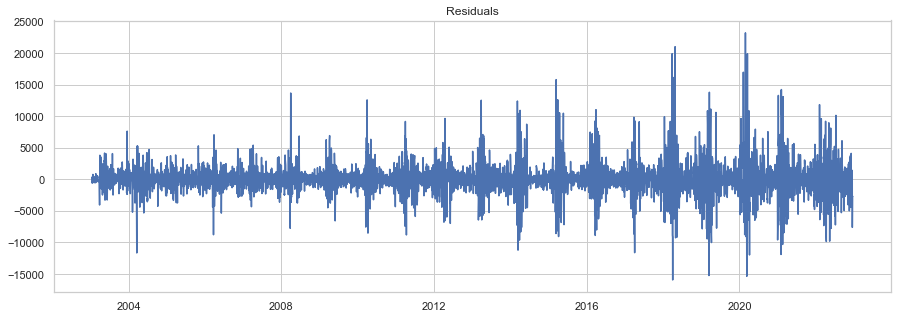

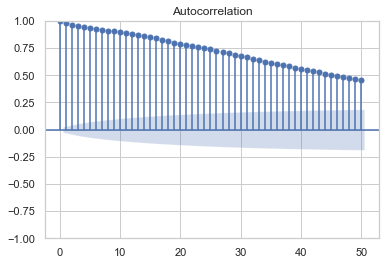

C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


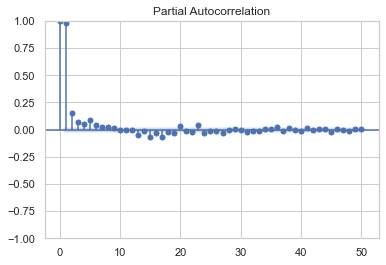

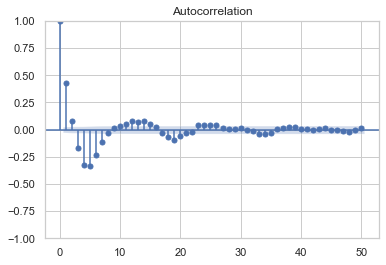

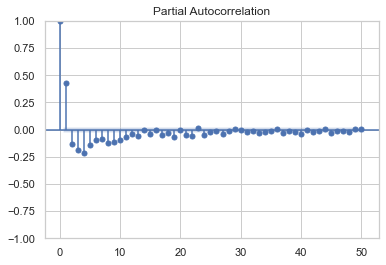

In [62]:
# plot the trend component
plt.figure(figsize=(15, 5))
plt.plot(decomposition.trend)
plt.title("Trend component")
plt.show()

# plot the residuals
plt.figure(figsize=(15, 5))
plt.plot(decomposition.resid)
plt.title("Residuals")
plt.show()

# plot the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["avg_price"], lags=50)
plt.show()

plot_pacf(df["avg_price"], lags=50)
plt.show()

# plot the autocorrelation of the residuals
plot_acf(decomposition.resid.dropna(), lags=50)
plt.show()

plot_pacf(decomposition.resid.dropna(), lags=50)
plt.show()


ADF Statistic: -6.608227390290976
p-value: True
ADF Statistic: -15.005541174993445
p-value: True


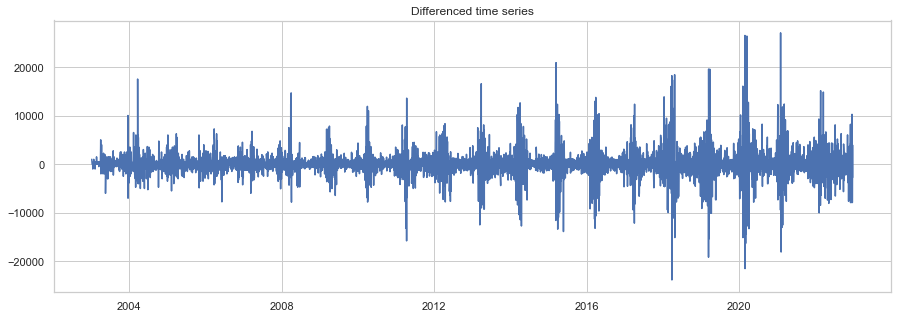

In [ ]:
# stationarity test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["avg_price"])
print("ADF Statistic:", result[0])
print("p-value:", result[1] < 0.05)

# differencing
df["diff"] = df["avg_price"].diff()
result = adfuller(df["diff"].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1] < 0.05)

# plot the differenced time series
plt.figure(figsize=(15, 5))
plt.plot(df["diff"])
plt.title("Differenced time series")
plt.show()


In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss

result = kpss(df["avg_price"])
print("KPSS Statistic:", result[0])
print("p-value:", result[1] < 0.05)

df["diff"] = df["avg_price"].diff()
result = kpss(df["diff"].dropna())

print("KPSS Statistic:", result[0])
print("p-value:", result[1] < 0.05)


KPSS Statistic: 3.07761244324307
p-value: True
KPSS Statistic: 0.0073394150818292606
p-value: False


C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

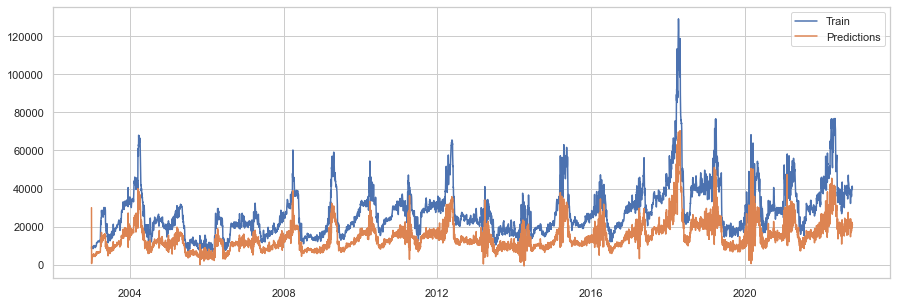

MSE: 215746072.1153923


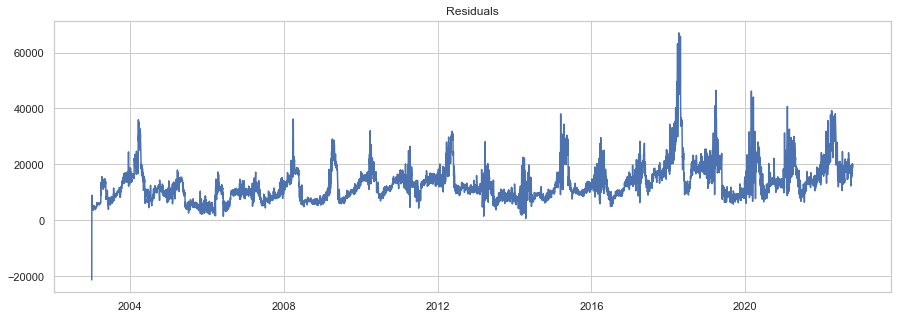

In [225]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# training set 
train = df["avg_price"].iloc[:-60]

# test set
test = test = df["avg_price"].iloc[-60:]

# fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model = model.fit()

# coefficients
sigma = model.params[1]
phi = model.params[0]

# residuals
residuals = model.resid

# construct ARIMA model 
preds = []
for i in range(len(train)):
    pred = phi * train[i-1] + sigma * residuals[i-1] + residuals[i]
    preds.append(pred)
    
# to dataframe, index is test data index
preds = pd.Series(preds, index=train.index)
    
# plot the predictions
plt.figure(figsize=(15, 5))
plt.plot(train, label="Train")
plt.plot(preds, label="Predictions")
plt.legend()
plt.show()

# evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(train, preds)
print("MSE:", mse)

# plot the residuals
plt.figure(figsize=(15, 5))
plt.plot(train - preds)
plt.title("Residuals")
plt.show()
    

MSE: 383378977.4527616


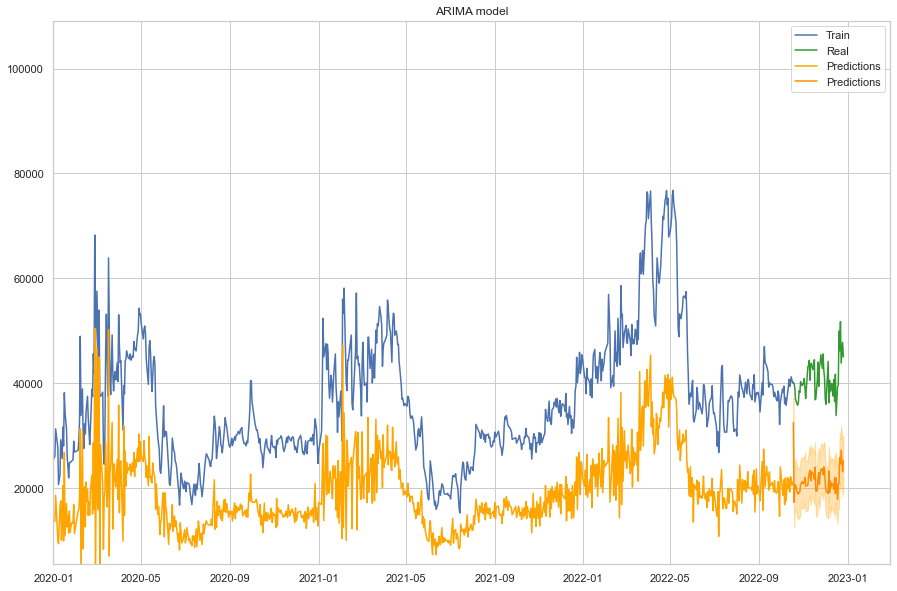

In [226]:
# test the model
real = df["avg_price"].iloc[-60:]

y_pred = []
for i in range(len(test)):
    pred = phi * test[i-1] + sigma * residuals[i-1] + residuals[i]
    y_pred.append(pred)
    
# dataframe with index as test data index
y_pred = pd.Series(y_pred, index=test.index)

# confidence intervals by y_pred +- 1.96 * sigma
sigma_test = sqrt(y_pred.var())
lower = y_pred - 1.96 * sigma_test
upper = y_pred + 1.96 * sigma_test

# evaluate the model
mse = mean_squared_error(real, y_pred)
print("MSE:", mse)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(train, label="Train")
plt.plot(real, label="Real", color="green", alpha=0.8)
plt.plot(preds, label="Predictions", color="orange")
plt.plot(y_pred, label="Predictions", color="darkorange")
plt.fill_between(y_pred.index, lower, upper, color="orange", alpha=0.3)
plt.title("ARIMA model")
plt.xlim("2020-01-01", "2023-03-01")
plt.ylim(min(train), max(train) - 20000)
plt.legend()
plt.show()
